##Tugas 11-12 EDA :

1. Lengkapi dan kerjakan kembali syntax yang dibuat pada saat Hands On: Exploratory Data Analysis with Python I dan II.

2. Pelajari syntax yang dibuat pada saat Hands On: Exploratory Data Analysis with Python I dan II dengan cara :

membuat summary terkait langkah-langkah yang dikerjakan
membuat storytelling terkait data analysis yang sudah dikerjakan dan hasil visualisasi
(Dikerjakan pada ipynb dan diletakkan diatas code yang sudah ditulis - dapat ditulis sebagai command atau text cell - agar lebih mudah dinilai)

## Load Data

In [ ]:
#for importing file
import pandas as pd

#Scientific Computing
import numpy as np

#for visualization
import seaborn as sns

#for visualization
import matplotlib.pyplot as plt

#for reading file
import io

#for uploading file
#from google.colab import files

#Pandas show all column
pd.set_option('display.max_columns', 200)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/dataset12.csv", sep = ',')

Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

## Data Understanding

Bertujuan untuk memahami dan menjelaskan data yang akan digunakan dalam analisis data. Pada tahapan ini, dilakukan eksplorasi data untuk memahami karakteristik data, jenis data, serta kualitas data. Tujuan utama dari tahapan data understanding adalah untuk mengidentifikasi masalah yang terdapat pada data dan memastikan kualitas data sebelum dilakukan pemodelan.

In [ ]:
#Menampilkan 5 kolom teratas dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Melihat Informasi Data( check for null value, melihat ada kolom apa saja, typedata yang dipakai, dll)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Menampilkan kolom yang ada di df
list(df.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Yang perlu diperhatikan:
- Apakah ada data dengan tipe yang kurang sesuai? Misal, Name dengan tipe int64
- Apakah ada data yang hilang? Cari kolom dengan count < jumlah row

##Data Cleaning

memproses data yang bertujuan untuk membersihkan data dari kesalahan dan ketidakakuratan yang dapat mempengaruhi hasil analisis data. Pada tahap ini, data diinspeksi secara mendalam untuk mengidentifikasi dan memperbaiki masalah pada data seperti missing values, outliers, dan duplikat.

In [ ]:
# Mengubah dtype kolom total charge dari object menjadi numeric(float)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce')
# OR
# df['TotalCharges'] = df['TotalCharges'].apply(lambda x: np.nan if x == ' ' else float(x))

In [ ]:
## Mengubah dtype kolom "SeniorCitizen" dari numeric(int) menjadi category(object)
df['SeniorCitizen']=df['SeniorCitizen'].astype('object')

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('O')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Tipe data "Total Charges" dan "SeniorCitizen" diubah dikarenakan tipe data sebelumnya tidak sesuai atau kurang sesuai, oleh karena itu dilakukan perubahan tipe data agar analysis bisa dilakukan.

###Missing Handling

In [ ]:
# menghitung jumlah nilai-nilai null atau missing values pada setiap kolom dalam dataframe
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df[df['TotalCharges'].isna()]
#Menghapus baris yang memiliki missing value
df=df.dropna()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#Menghapus kolom yang tidak dibutuhkan atau tidak relevant
df=df.drop(columns=['customerID'])

Jika data memiliki null value yang dengan jumlah yang sedikit maka boleh saja untuk menghapus semua baris yang memiliki null value. agar data menjadi lebih bagus dan hasil analisis lebih tepat.

Kolom CUstomerID juga dihapus karena tidak dibutuhkan dalam kasus ini

SUMMARY :

1.   Mengubah Tipe Data
2.   Menghapus baris yang memiliki null value
3.   Menghapus kolom yang tidak dibutuhkan



##Data Visualization

Menampilkan data dalam bentuk grafik atau visualisasi yang dapat membantu memperjelas informasi dari data yang kompleks. Tujuannya adalah untuk menghasilkan visualisasi data yang mudah dimengerti dan memberikan wawasan tentang karakteristik data yang relevan.

###Stastistical Summary

Selanjutnya kita munculkan ringkasan statistik dataframe

In [ ]:
# Menampilkan Statistical Summmary
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
df.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5854,Female,0,No,No,15,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,48.8,720.1,No


In [ ]:
cats = [i for i in df.columns if df[i].dtype == 'object' and i != 'Churn']
#  membuat daftar cats dengan list comprehension yang mengiterasi kolom-kolom DataFrame df. Kode tersebut memeriksa apakah tipe data setiap kolom = object dan nama kolom bukan Churn.

nums = [i for i in df.columns if df[i].dtype != 'object']
#  membuat daftar nums list comprehension yang mengiterasi kolom-kolom DataFrame df. Kode tersebut memeriksa apakah tipe data setiap kolom != object

Penyimpanan kolom diatas memudahkan untuk proses kedepannya dimana kita fokus pada kolom - kolom yang akan dilakukan analisis

In [ ]:
#  melakukan loop pada setiap elemen di dalam daftar cats, dan untuk setiap elemen, mencetak output berupa perhitungan jumlah kemunculan setiap nilai unik dalam kolom tersebut.
for col in cats:
  print(df[col].value_counts())
  print()

Male      3549
Female    3483
Name: gender, dtype: int64

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

No     3639
Yes    3393
Name: Partner, dtype: int64

No     4933
Yes    2099
Name: Dependents, dtype: int64

Yes    6352
No      680
Name: PhoneService, dtype: int64

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

No                     2809
Yes     

Summary :  
- Membagi kolom berdasarkan tipe data value kolom tersebut, mnejadi nums = kolom-kolom dengan value numeric dan cats = kolom - kolom dengan value category

###Pendekatan Numerik

In [ ]:
df[nums].describe().T
#  menghitung statistik deskriptif (seperti mean, median, dan quartil) dari setiap kolom numerik pada DataFrame df[nums]

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


Summary :    Menampilkan Statistik deskriptif dari kolom kolom yang bertipe data numeric

Yang perlu diperhatikan:
- Apakah nilai yang tertera pada setiap kolom masuk akal?
- Apakah nilai maksimal/minimal masih berada di batas wajar? Min/max yang terlalu jauh dari mean/median bisa jadi indikasi kesalahan input data
- Apakah ada kolom dengan perbedaan yang signifikan antara mean dan median? Perbedaan antara mean/median mengindikasikan outlier atau skewed distribution

###Pendekatan Categoric

In [ ]:
df[cats].describe().T
# describe digunakan pada kolom dengan type data object
# T = Transpose, mentranspose susunan baris dan kolom sehingga baris menjadi kolom dan sebaliknya

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


Summary :    Menampilkan Statistik deskriptif dari kolom kolom yang bertipe data category

Yang perlu diperhatikan:
- Apakah jumlah unique values masuk akal?
- Apakah frekuensi dari nilai yang paling umum terlalu timpang? Apabila distribusi nilai terlalu timpang, feature tidak akan terlalu berguna dalam klasifikasi

###Univariate Analysis

Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

In [ ]:
# Menampilkan 5 baris atas df[Nums]
df[nums].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


###Box Plot

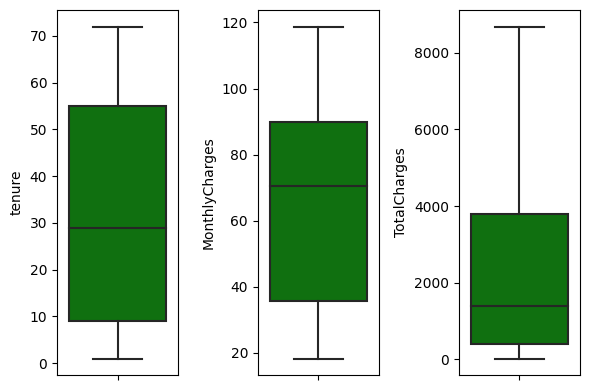

In [ ]:
plt.figure(figsize = (6,4))
# membuat suatu figure baru dengan ukuran 6x4 (inch) untuk menampilkan box plot.
for i in range (0, len(nums)):
  # melakukan loop untuk setiap kolom numerik
  plt.subplot(1,3, i+1)
  # menentukan letak gambar dengan membuat subplot 1x3, dengan nomor subplot ditentukan oleh variabel i, Pada contoh ini, subplot akan ditempatkan di baris 1, kolom ke-i+1, sehingga setiap subplot akan ditempatkan secara horizontal dari kiri ke kanan.
  sns.boxplot(y = df[nums[i]], color = 'green', orient = 'V')
  # dengan sumbu y menampilkan data pada kolom numerik tersebut, warna hijau sebagai warna plot, dan orientasi plot vertikal.
  plt.tight_layout()
  # Menyesuaikan tata letak plot agar lebih rapi dan mudah dibaca

Diatas adalah box plot yang menampilkan nilain maksimal dan mminimun, juga q1, nilai tengah, q3 dari kolom tenure,MonthlylCharge dan Total Charges. Tidak ada Outliers dari 3 kolom tersebut

Yang perlu diperhatikan:
- Berapa banyak dan berapa jauh outlier di setiap kolom? Definisi umum outlier: berjarak 1.5x IQR dari Q1/Q3
- Bagaimana Distribusi Datanya ?

###Hist Plot

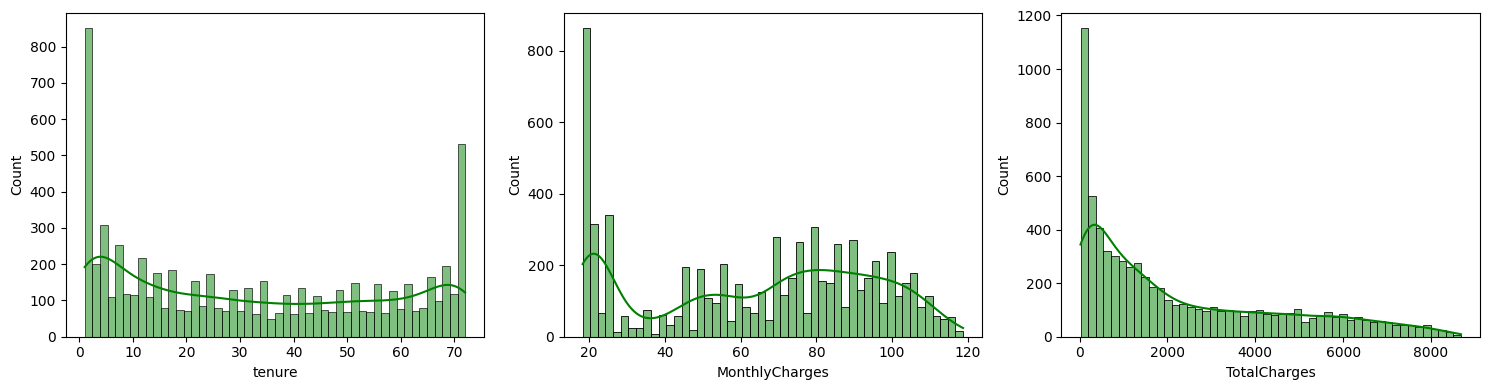

In [ ]:
plt.figure(figsize = (15,4))
for i in range(0, len(nums)):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[nums[i]], color = 'green', kde = True, bins=50)
    plt.tight_layout()

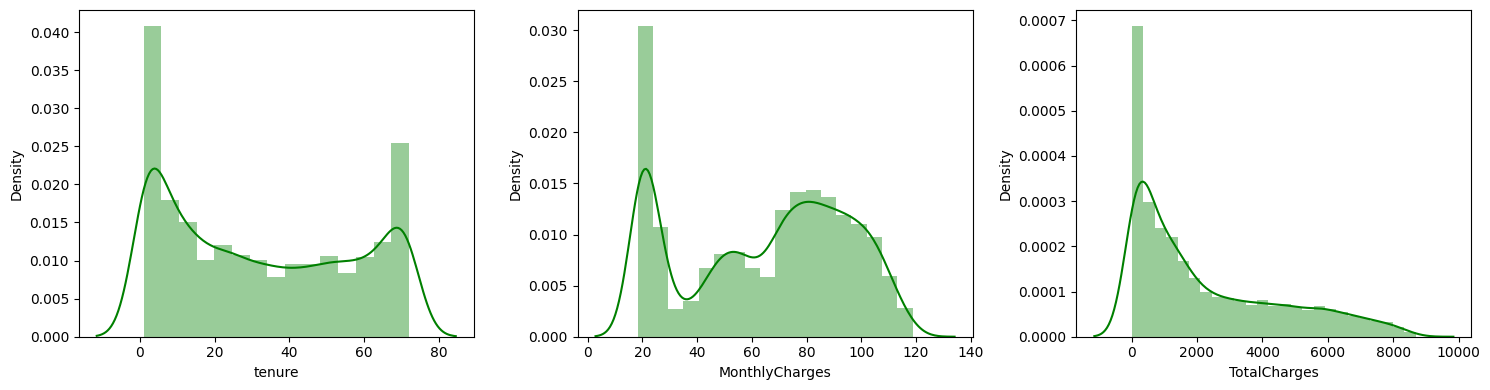

In [ ]:
plt.figure(figsize = (15,4))
for i in range(0, len(nums)):
    plt.subplot(1, 3, i+1)
    sns.distplot(df[nums[i]], color = 'green')
    plt.tight_layout()

Yang perlu diperhatikan:
- Bagaimana bentuk distribusi setiap kolom? Apakah normal? Positive skewed? Negative skewed? Bimodal?
- Apakah ada nilai-nilai tertentu yang umum? Lonjakan pada distribution plot mungkin menmiliki makna tertentu

###Countplot

In [ ]:
df[cats].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [ ]:
len(cats)
# cats = memiliki 16 kolom, sehingga kita bisa tau, berapa ukuran figsize dan subplot yang coock untuk 16 kolom dibawah

16

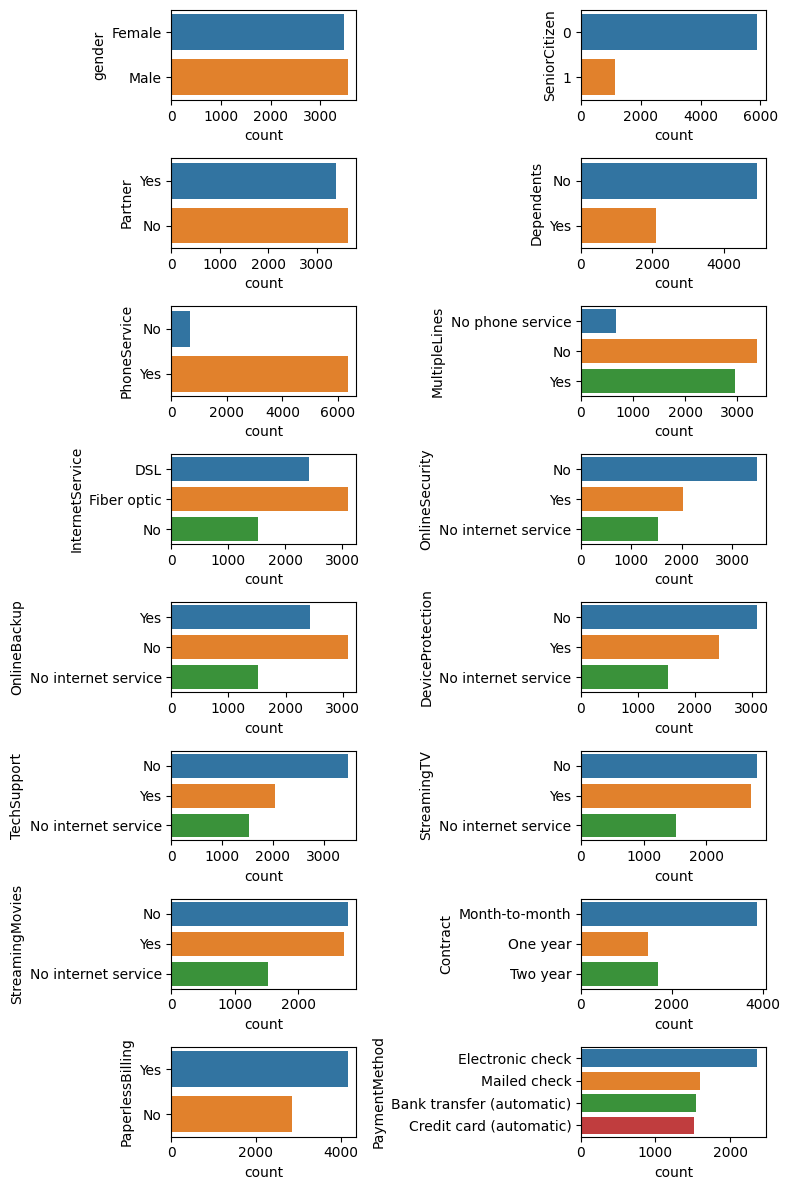

In [ ]:
plt.figure(figsize =(8,12))
for i in range (0, len(cats)):
  plt.subplot(8, 2, i+1)
  sns.countplot(y = df[cats[i]], orient = 'v')
  plt.tight_layout()

Diatas count plot yang menghitung 16 kolom dengan type data category "cats", dimana fungsinya menghitung jumlah dari value yang ada di masing masing

Yang perlu diperhatikan:
- Ketimpangan antar kategori, terutama pada target Sebaran kategori yang timpang pada feature merupakan indikasi ketidakgunaan feature. Pada target, sebaran yang timpang dapat membuat proses learning gagal.

###Bivariate Analysis

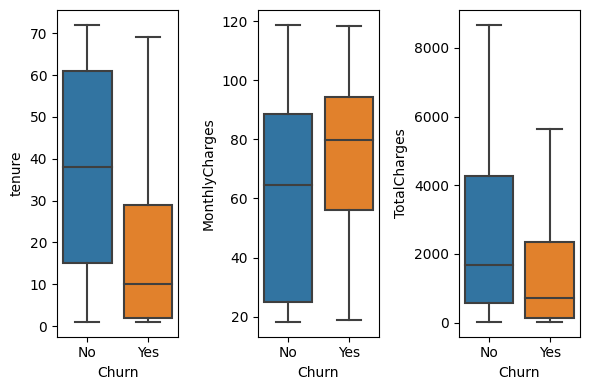

In [ ]:
plt.figure(figsize = (6,4))
for i in range(0, len(nums)):
  plt.subplot(1,3, i+1)
  sns.boxplot( y = df[nums[i]], x = df['Churn'], orient = 'v', showfliers = False)
  plt.tight_layout()

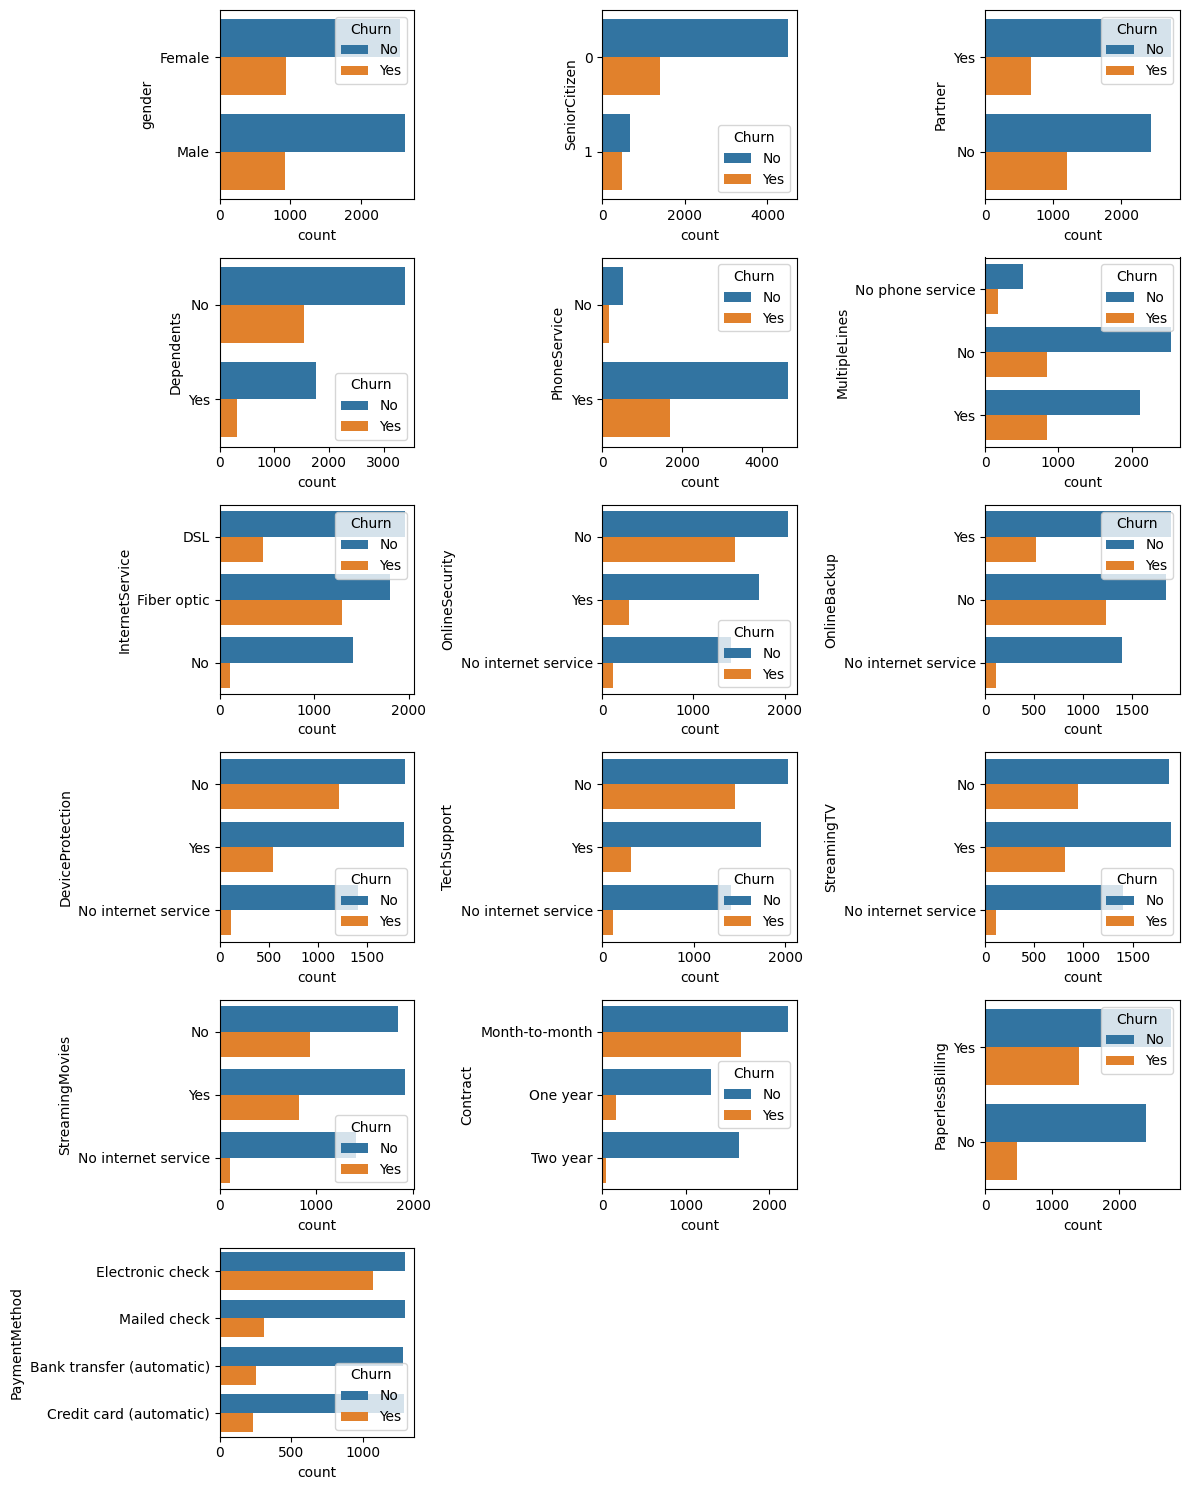

In [ ]:
plt.figure(figsize = (12,15))
for i in range(0, len(cats)):
    plt.subplot(6, 3, i+1)
    sns.countplot(y = df[cats[i]], hue = df['Churn'], orient = 'v')
    plt.tight_layout()

## Multivariate Analysis

Setelah menilik setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

### Correlation heatmap

<Axes: >

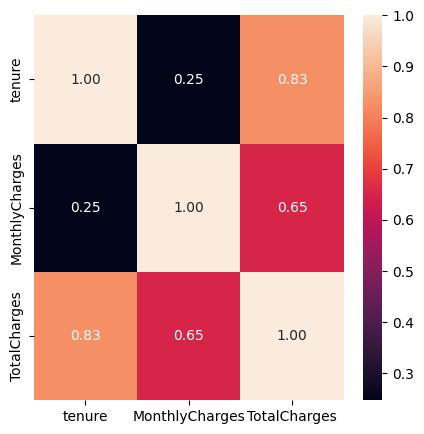

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(), annot = True, fmt=".2f")

In [ ]:
df[cats].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [ ]:
df2 = pd.get_dummies(df, drop_first = True)

In [ ]:
df2.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


<Axes: >

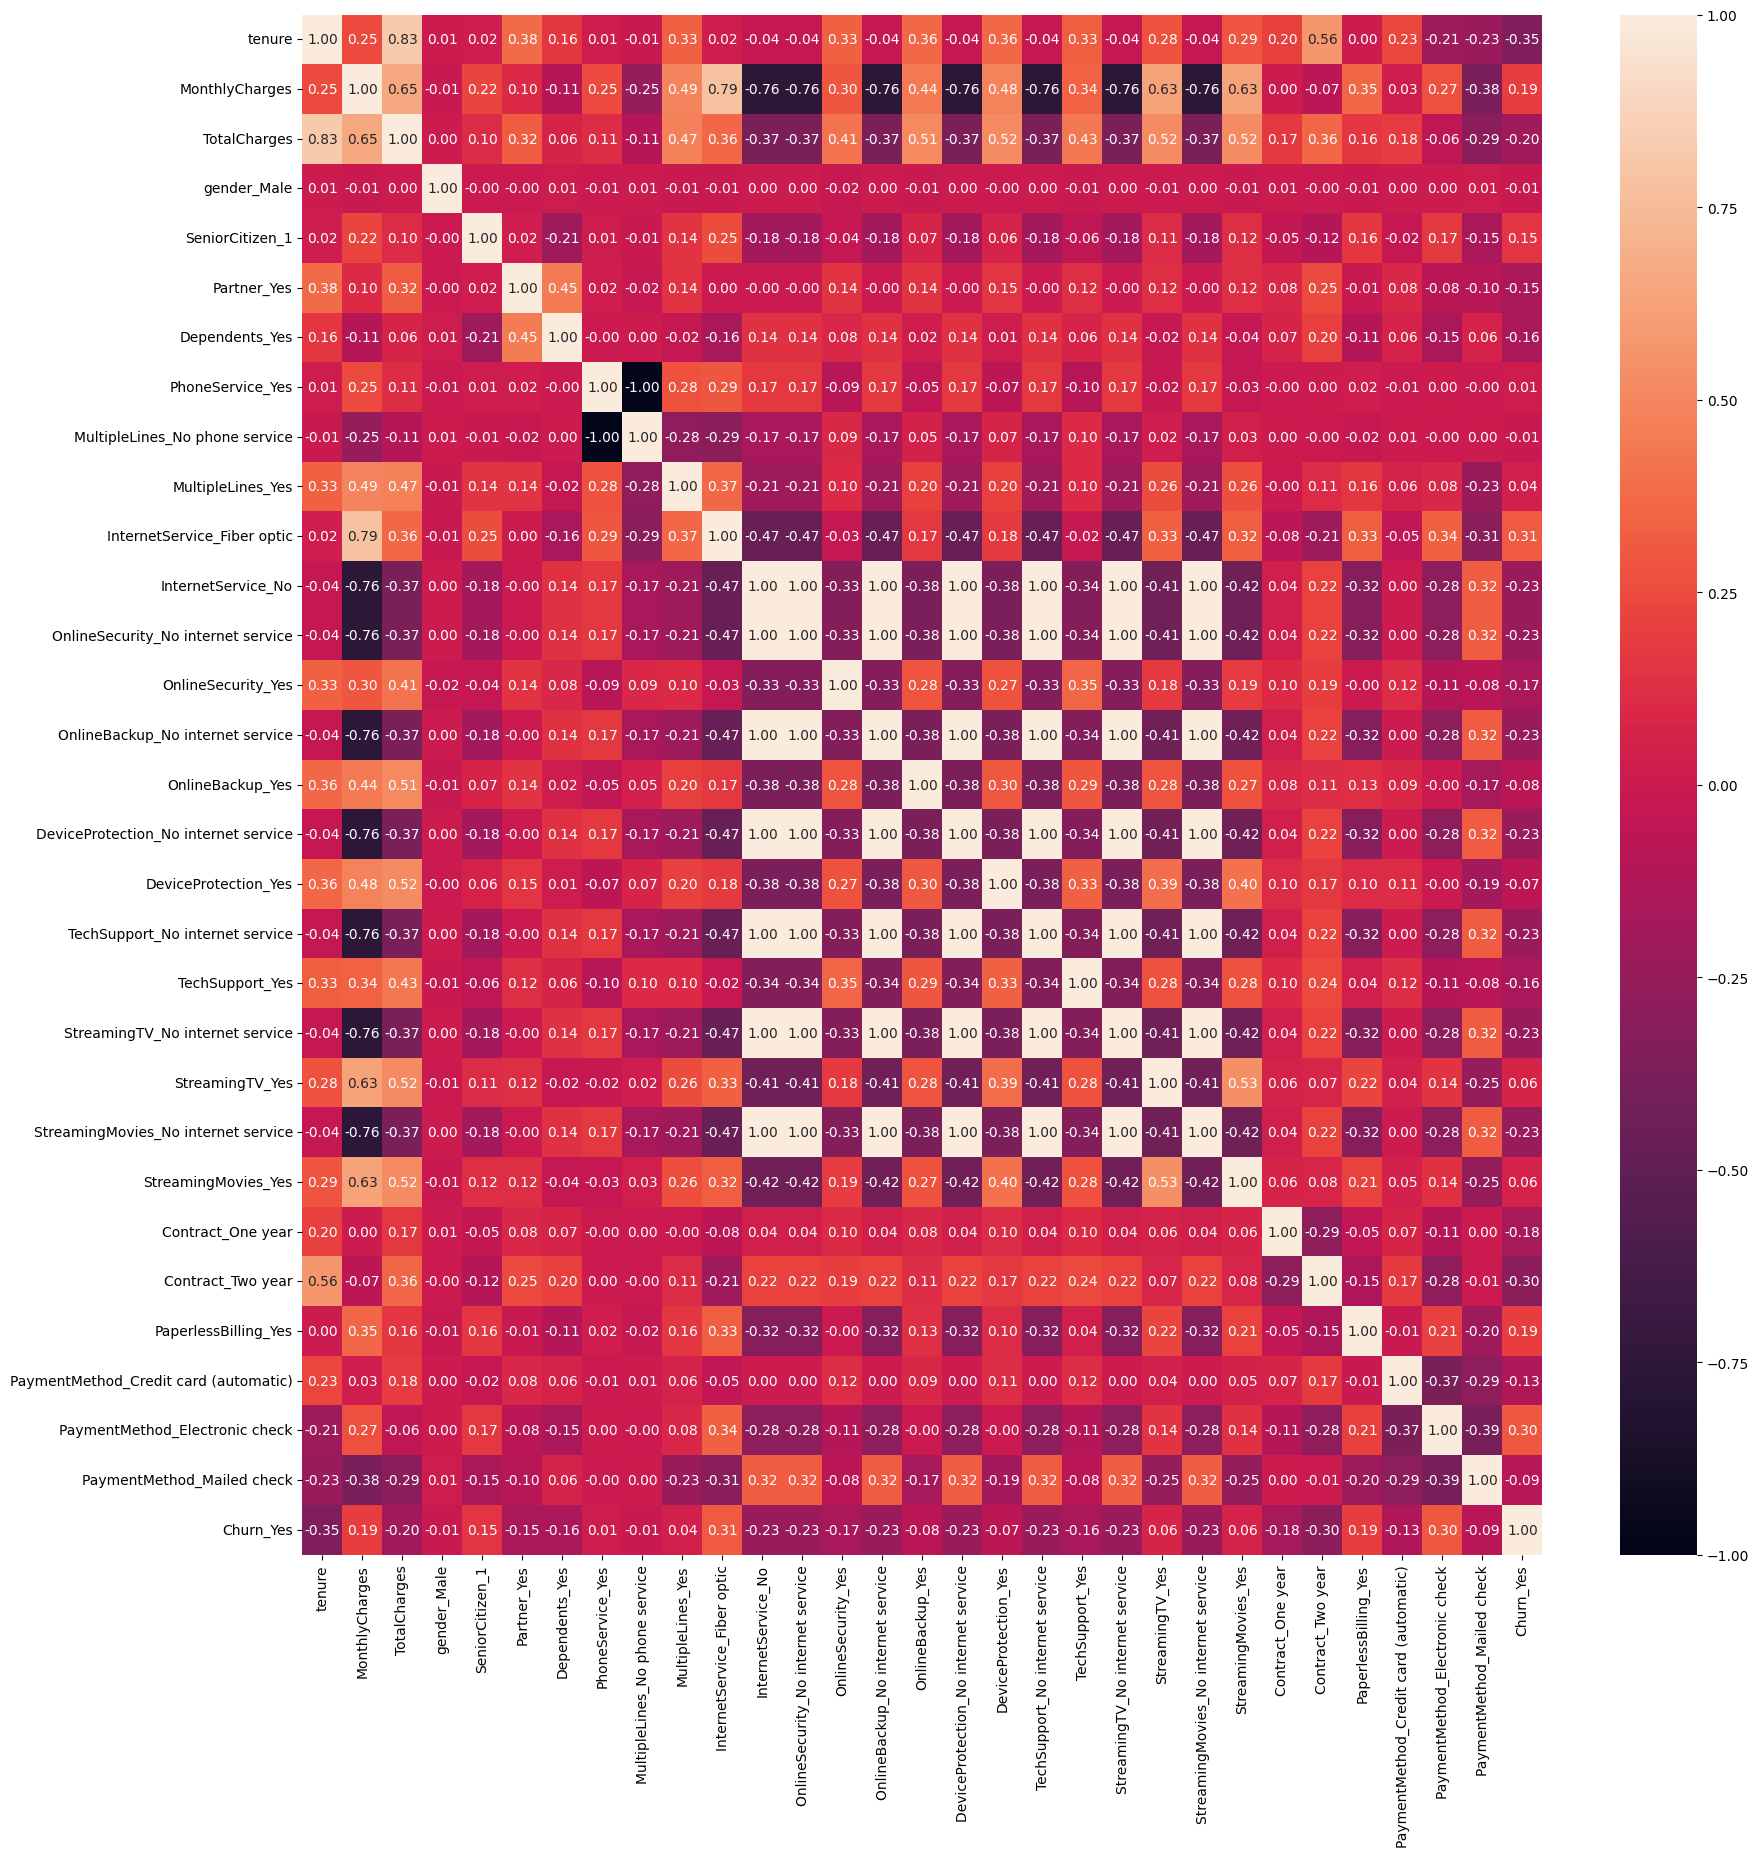

In [ ]:
plt.figure(figsize = (20, 20))
sns.heatmap(df2.corr(), annot = True, fmt=".2f")

In [ ]:
df2.corr()['Churn_Yes']

tenure                                  -0.354049
MonthlyCharges                           0.192858
TotalCharges                            -0.199484
gender_Male                             -0.008545
SeniorCitizen_1                          0.150541
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
PhoneService_Yes                         0.011691
MultipleLines_No phone service          -0.011691
MultipleLines_Yes                        0.040033
InternetService_Fiber optic              0.307463
InternetService_No                      -0.227578
OnlineSecurity_No internet service      -0.227578
OnlineSecurity_Yes                      -0.171270
OnlineBackup_No internet service        -0.227578
OnlineBackup_Yes                        -0.082307
DeviceProtection_No internet service    -0.227578
DeviceProtection_Yes                    -0.066193
TechSupport_No internet service         -0.227578
TechSupport_Yes                         -0.164716


Yang perlu diperhatikan:
- Apakah feature memiliki korelasi dengan target? Bila tidak, maka model linear tidak dapat digunakan
- Apakah ada 2 feature yang berkorelasi kuat (>0.9)? Bila ya, ada kemungkinan besar kedua feature tersebut redundan

### Category Plot

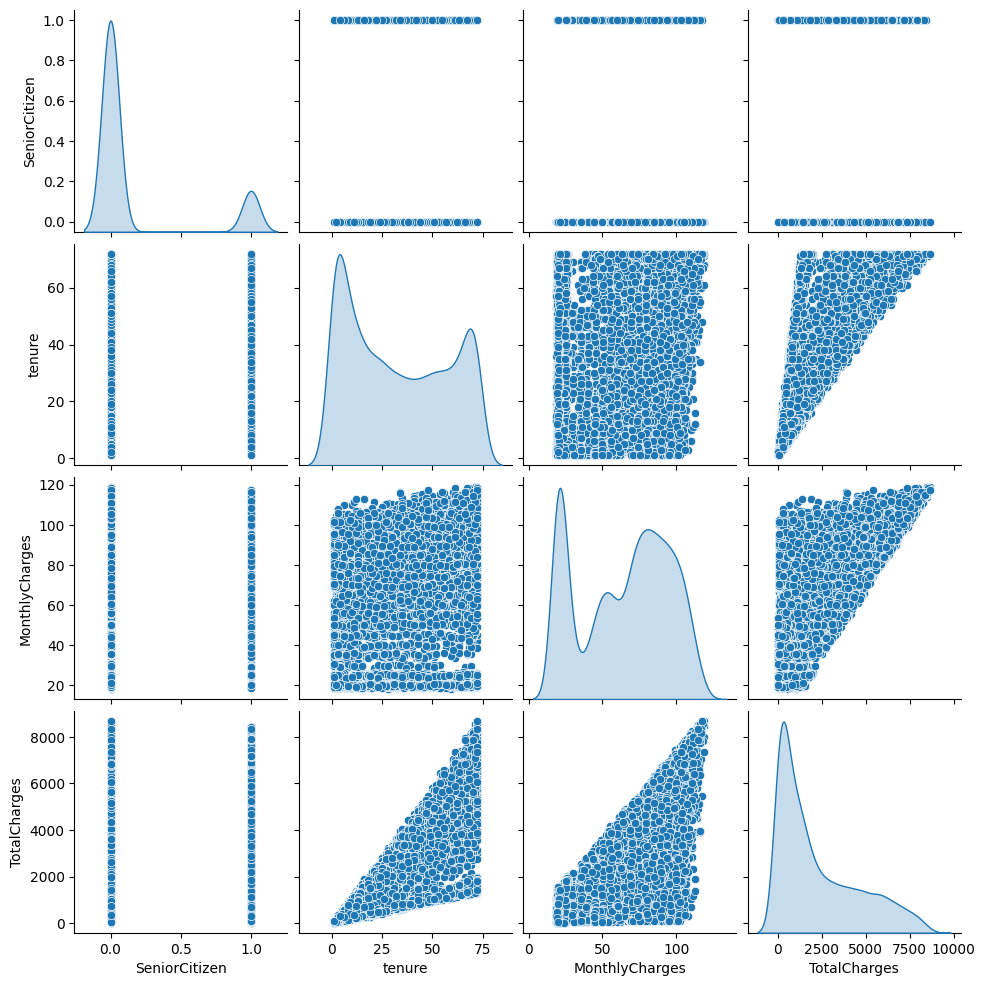

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

**Apakah ada scatter plot yang menunjukkan cluster yang
cukup jelas? Pola pada scatter plot bisa menjadi petunjuk untuk membuat feature baru**

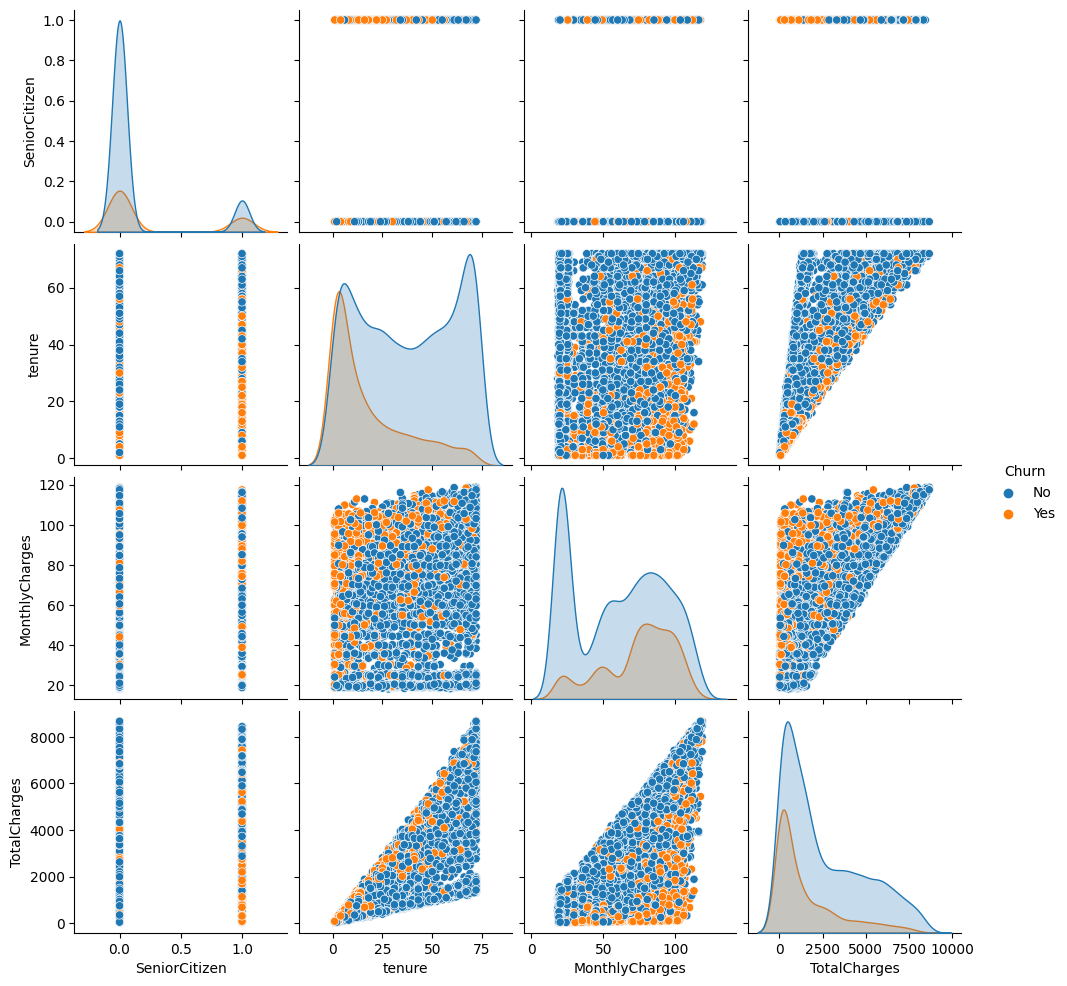

In [ ]:
sns.pairplot(df, diag_kind = 'kde', hue = 'Churn')

Yang perlu diperhatikan:
- Apakah ada scatter plot dimana kedua warna terpisah dengan baik? Scatter plot dimana target terpisah dapat menjadi indikasi kombinasi fitur yang baik

##Visualization

In [ ]:
#get dummies to transform data
df2=pd.get_dummies(df,drop_first=True)

In [ ]:
#correlation

# 0 no correlation
# 1 positive correlation
# -1 negative correlation

df3=df2.corr()['Churn_Yes'].sort_values().reset_index()

df3

,index,Churn_Yes
0,tenure,-0.354049
1,Contract_Two year,-0.301552
2,OnlineBackup_No internet service,-0.227578
3,OnlineSecurity_No internet service,-0.227578
4,InternetService_No,-0.227578
5,TechSupport_No internet service,-0.227578
6,StreamingMovies_No internet service,-0.227578
7,StreamingTV_No internet service,-0.227578
8,DeviceProtection_No internet service,-0.227578
9,TotalCharges,-0.199484


In [ ]:
#drop Churn_Yes
df3=df3[~df3['index'].str.contains('Churn_Yes')]

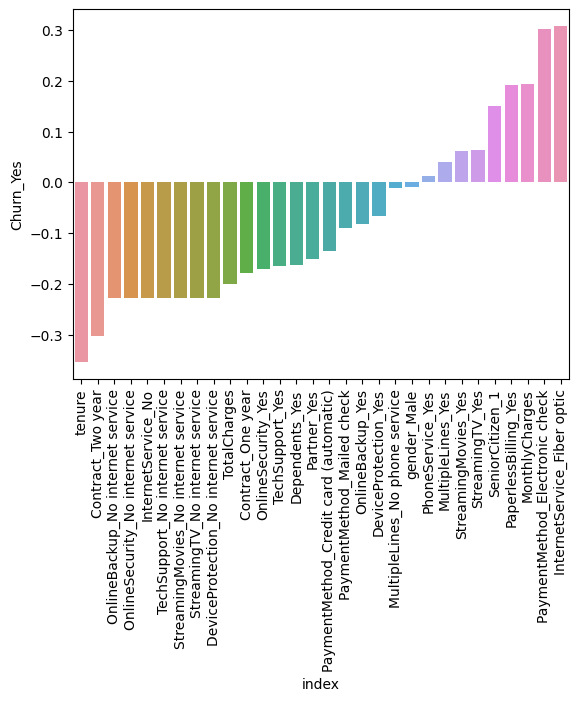

In [ ]:
chart = sns.barplot(data=df3,x="index",y="Churn_Yes")

for item in chart.get_xticklabels():
  item.set_rotation(90)

<Axes: >

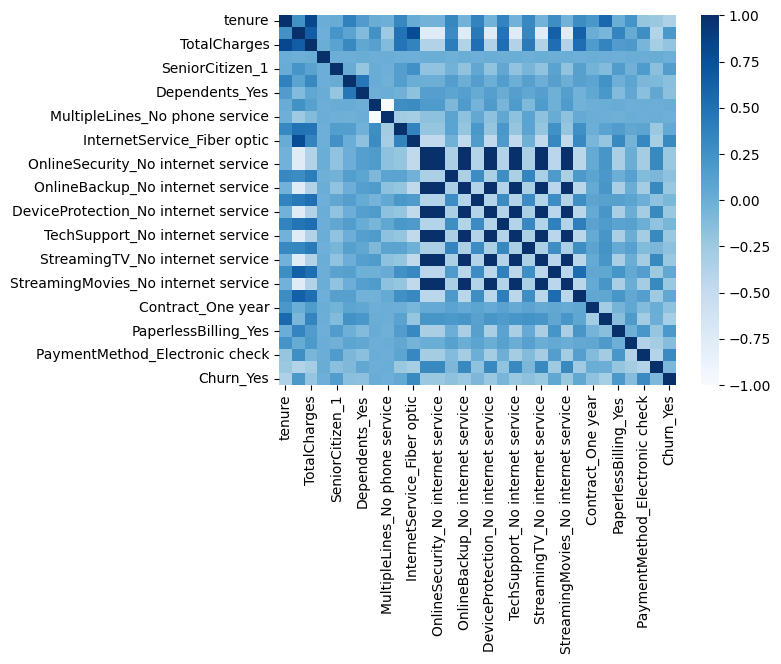

In [ ]:
#Heatmap to check correlation
sns.heatmap(df2.corr(),cmap="Blues")